# Comparing Rstudio Bradley Terrry2 with NG code

## Code

In [194]:
#imports
import matplotlib.pyplot as plt
from math import pi
import pandas as pd
import seaborn as sb
from itertools import combinations
import re
import numpy as np
np.random.seed(9)
from IPython.display import Image
path=r"C:\Users\al33m\Box Sync\Grzywacz Lab\Experiment\Data_Files\noCorrTaskNew_Data\Data"

In [195]:
# functions

def findPattern(string,pattern):
    #function that finds pattern and returns true if found 
    prog = re.compile(pattern)
    result = prog.findall(string)
    return((result))

def score(df,stim,winner):
    if winner==stim[0]: #if first of pair is winner
        if np.isnan(df[stim[0]][stim[1]]):
            df[stim[0]][stim[1]]=1 #go to that coordinate and put 1 
        else:
            df[stim[0]][stim[1]]+=1#if not nan, then can add to it
        df[stim[1]][stim[0]]=0 #go to symmetric coordinate and add 0
    if winner==stim[1]:
        if np.isnan(df[stim[1]][stim[0]]):
            df[stim[1]][stim[0]]=1
        else:
            df[stim[1]][stim[0]]+=1

        df[stim[0]][stim[1]]=0
    def radarPlot(counts_df1,categories):
        
#         if category=='Cars':
#             counts_df1=self.preCarsCountsSorted
#             counts_df2=self.postCarsCountsSorted
#         if category=='Faces':
#             counts_df1=self.preFacesCountsSorted
#             counts_df2=self.postFacesCountsSorted
#         if category=='Shirts':
#             counts_df1=self.preShirtsCountsSorted
#             counts_df2=self.postShirtsCountsSorted
            
            
#         categories=[str(i) for i in counts_df1.index]
        N = len(categories)

        values1=[i for i in counts_df1.values]
        values1 += values1[:1] #makes it circular
#         print(values1)

#         values2=[i for i in counts_df2[0].values]
#         values2 += values2[:1] #makes it circular


        # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
        angles = [n / float(N) * 2 * pi for n in range(N)]
        angles += angles[:1]

        # Initialise the spider plot
        ax = plt.subplot(111, polar=True)

        # Draw one axe per variable + add labels labels yet
        plt.xticks(angles[:-1], categories, color='grey', size=8)

        # Draw ylabels
        ax.set_rlabel_position(0)
        plt.yticks([],[],color="black", size=5)
        plt.ylim(0,np.max(values1))
        # Plot data
        ax.plot(angles, values1, linewidth=1, linestyle='solid')
#         ax.plot(angles, values2, linewidth=1, linestyle='solid')


        # Fill area
        ax.fill(angles, values1, 'b', alpha=0.1)
#         ax.fill(angles, values2, 'r', alpha=0.1)
        
        
#         ax.legend(['Pre','Post'])
#         plt.title(self.subname+' '+category)
        return(plt.subplot)

In [196]:
#set up df
df=pd.DataFrame([i for i in combinations(['item'+str(i) for i in range(10)],2)],columns=['ItemA','ItemB'])


In [197]:
# pdict
items=['item'+str(i) for i in range(10)]
probs=np.geomspace(0.5,1,11)[0:-1]
pDict=dict(zip(items,probs));pDict

{'item0': 0.5,
 'item1': 0.5358867312681466,
 'item2': 0.5743491774985174,
 'item3': 0.6155722066724582,
 'item4': 0.6597539553864471,
 'item5': 0.7071067811865476,
 'item6': 0.7578582832551991,
 'item7': 0.8122523963562356,
 'item8': 0.8705505632961241,
 'item9': 0.9330329915368074}

In [198]:
#fight until one wins
def fight(itemA,itemB): 
    """
    this function takes two items with different probabilities and gives back 
    which is the winner
    """
    wA=np.random.choice([1,0],p=[pDict[itemA],1-pDict[itemA]])
    wB=np.random.choice([1,0],p=[pDict[itemB],1-pDict[itemB]])
    while wA==wB:
        wA=np.random.choice([1,0],p=[pDict[itemA],1-pDict[itemA]])
        wB=np.random.choice([1,0],p=[pDict[itemB],1-pDict[itemB]])
    return(wA,wB)


In [199]:
# initate DF
oneZeroDict={0:1,1:0}
df['itemAwins']=np.random.choice([0,1],len(df))
df['itemBwins']=[oneZeroDict[i] for i in df['itemAwins']]#foo is a dictionary to get the opposite
df['Winner']=np.where(df.itemAwins>df.itemBwins,df.ItemA,df.ItemB)
df['Loser']=np.where(df.itemAwins>df.itemBwins,df.ItemB,df.ItemA)
df

,ItemA,ItemB,itemAwins,itemBwins,Winner,Loser
0,item0,item1,0,1,item1,item0
1,item0,item2,0,1,item2,item0
2,item0,item3,0,1,item3,item0
3,item0,item4,1,0,item0,item4
4,item0,item5,0,1,item5,item0
5,item0,item6,0,1,item6,item0
6,item0,item7,1,0,item0,item7
7,item0,item8,0,1,item8,item0
8,item0,item9,1,0,item0,item9
9,item1,item2,1,0,item1,item2


In [200]:
#comparison mat
ComparisonMat_df=pd.DataFrame(columns=items,index=items)
for i in range(len(df)):
        score(ComparisonMat_df,[df['ItemA'][i],df['ItemB'][i]],df['Winner'][i])
ComparisonMat_df

,item0,item1,item2,item3,item4,item5,item6,item7,item8,item9
item0,NaN,1,1,1,0,1,1,0,1,0
item1,0,NaN,0,1,1,0,1,1,0,1
item2,0,1,NaN,0,0,0,0,1,1,1
item3,0,0,1,NaN,1,0,1,1,1,0
item4,1,0,1,0,NaN,1,1,1,1,1
item5,0,1,1,1,0,NaN,1,1,1,0
item6,0,0,1,0,0,0,NaN,1,0,0
item7,1,0,0,0,0,0,0,NaN,0,0
item8,0,1,0,0,0,0,1,1,NaN,1
item9,1,0,0,1,0,1,1,1,0,NaN


value represents column win against respective row

In [201]:
ComparisonMat_df.T

,item0,item1,item2,item3,item4,item5,item6,item7,item8,item9
item0,NaN,0,0,0,1,0,0,1,0,1
item1,1,NaN,1,0,0,1,0,0,1,0
item2,1,0,NaN,1,1,1,1,0,0,0
item3,1,1,0,NaN,0,1,0,0,0,1
item4,0,1,0,1,NaN,0,0,0,0,0
item5,1,0,0,0,1,NaN,0,0,0,1
item6,1,1,0,1,1,1,NaN,0,1,1
item7,0,1,1,1,1,1,1,NaN,1,1
item8,1,0,1,1,1,1,0,0,NaN,0
item9,0,1,1,0,1,0,0,0,1,NaN


for norberto's code, this scheme is inverted!

In [202]:
# #save
# ComparisonMat_df.T.to_csv(path+'\\dfCompMat.csv',index=False,header=False)

In [203]:
#now add back comparisons for rstudio
same=pd.DataFrame([i for i in zip(items,items)])
zeros=pd.DataFrame(np.zeros(len(items)))
ties=pd.concat([same,zeros,zeros,same],axis=1)
ties.columns=df.columns
ties

,ItemA,ItemB,itemAwins,itemBwins,Winner,Loser
0,item0,item0,0.0,0.0,item0,item0
1,item1,item1,0.0,0.0,item1,item1
2,item2,item2,0.0,0.0,item2,item2
3,item3,item3,0.0,0.0,item3,item3
4,item4,item4,0.0,0.0,item4,item4
5,item5,item5,0.0,0.0,item5,item5
6,item6,item6,0.0,0.0,item6,item6
7,item7,item7,0.0,0.0,item7,item7
8,item8,item8,0.0,0.0,item8,item8
9,item9,item9,0.0,0.0,item9,item9


In [204]:
dfwTies=pd.concat([df,ties],ignore_index=True)

In [205]:
# dfwTies.to_csv(path+"\\dfWTies.csv",index=False)

## Results of models from a random session

#### Set the wins for 10 items to be random to see basic functionality from bradley terry packages. N=1 here in terms of number of comparisons

In [206]:
#read in csv
dfprobs=pd.read_csv(r"C:\Users\al33m\OneDrive\Documents\probsdf.csv")
dfprobs.index=items
dfprobs.columns=items
dfprobs.values[[np.arange(dfprobs.shape[0])]*2] = 1# set to 1 to match norberto's convention
dfprobs


C:\Users\al33m\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  """


,item0,item1,item2,item3,item4,item5,item6,item7,item8,item9
item0,1.000000,0.381405,0.276981,0.381405,0.631451,0.500000,0.113906,0.056467,0.276981,0.381405
item1,0.618595,1.000000,0.383222,0.500000,0.735369,0.618595,0.172521,0.088476,0.383222,0.500000
item2,0.723019,0.616778,1.000000,0.616778,0.817266,0.723019,0.251248,0.135112,0.500000,0.616778
item3,0.618595,0.500000,0.383222,1.000000,0.735369,0.618595,0.172521,0.088476,0.383222,0.500000
item4,0.368549,0.264631,0.182734,0.264631,1.000000,0.368549,0.069791,0.033751,0.182734,0.264631
item5,0.500000,0.381405,0.276981,0.381405,0.631451,1.000000,0.113906,0.056467,0.276981,0.381405
item6,0.886094,0.827479,0.748752,0.827479,0.930209,0.886094,1.000000,0.317664,0.748752,0.827479
item7,0.943533,0.911524,0.864888,0.911524,0.966249,0.943533,0.682336,1.000000,0.864888,0.911524
item8,0.723019,0.616778,0.500000,0.616778,0.817266,0.723019,0.251248,0.135112,1.000000,0.616778
item9,0.618595,0.500000,0.383222,0.500000,0.735369,0.618595,0.172521,0.088476,0.383222,1.000000


#### from R studio

Text(0.5, 1.0, 'From R studio')

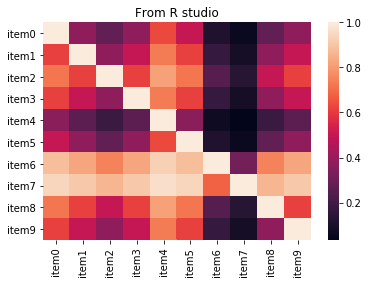

In [207]:
# this represents the comparisons from different items based on their ability from R studio
sb.heatmap(dfprobs).set_title('From R studio')


#### from NG code

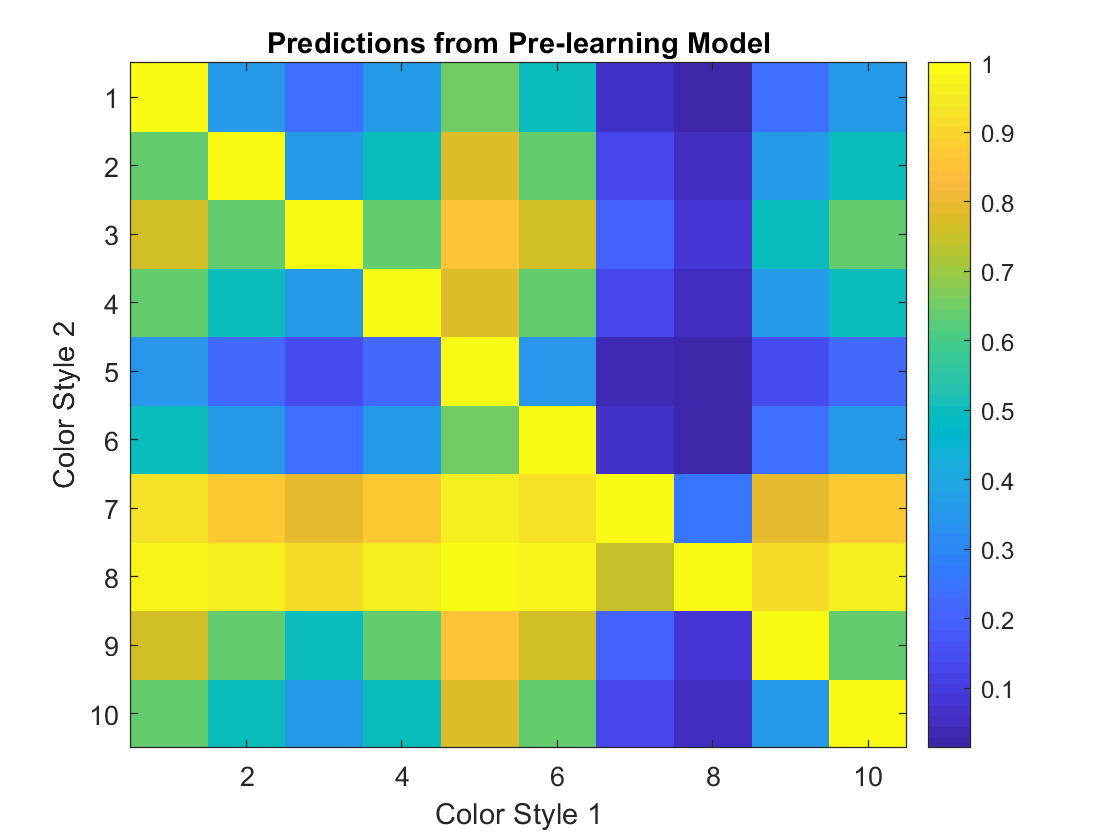

In [208]:
# from NG matlab code
Image(filename=path+'\\fromNG.png')


#### Specific BT abilities from both models

In [209]:
# here are the specific BT abilities from both models
ngPar=[0.0280,0.0492,0.5827,0.1948,0.0159,0.0083,0.0280,0.0492,0.0280,0.0159]
rPar=[0.000000e+00,4.835899e-01,9.594864e-01,4.835899e-01,-5.384470e-01,5.778845e-16,2.051452e+00,2.815979e+00,9.594864e-01,4.835899e-01]
ref4=0.538447,1.022037,1.497933,1.022037,0,0.538447,2.589899,3.354426,1.497933,1.022037
parDF=pd.DataFrame({'Items':items,'NGpars': ngPar,'Rpars':rPar,'refitem4': ref4,'frequencyWins':[df.Winner.value_counts()[i] for i in items]})
parDF

,Items,NGpars,Rpars,refitem4,frequencyWins
0,item0,0.0280,0.000000e+00,0.538447,3
1,item1,0.0492,4.835899e-01,1.022037,4
2,item2,0.5827,9.594864e-01,1.497933,5
3,item3,0.1948,4.835899e-01,1.022037,4
4,item4,0.0159,-5.384470e-01,0.000000,2
5,item5,0.0083,5.778845e-16,0.538447,3
6,item6,0.0280,2.051452e+00,2.589899,7
7,item7,0.0492,2.815979e+00,3.354426,8
8,item8,0.0280,9.594864e-01,1.497933,5
9,item9,0.0159,4.835899e-01,1.022037,4


Above table represents the BT abilities from r studio and NG matlab code. the 'refitem4' column represents a functionality in r studio where you can set any one item to be a reference for the others. I set it to item4 because it is the smallest. The 'frequencyWins' column is the actual win count for each item

#### Bt abilities Plotted in circular space

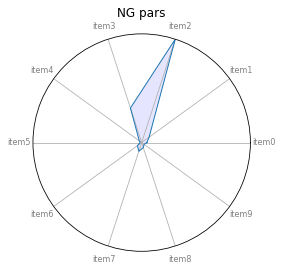

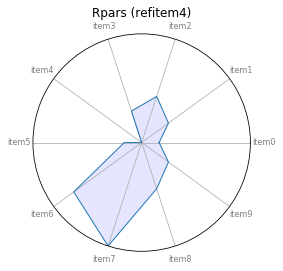

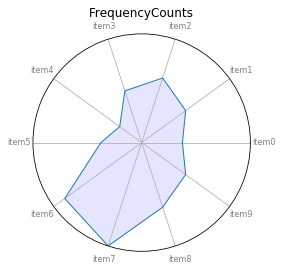

In [210]:
#plots
radarPlot(parDF['NGpars'],items)
plt.title('NG pars')
plt.show()
radarPlot(parDF['refitem4'],items)
plt.title('Rpars (refitem4)')
plt.show()
radarPlot(parDF['frequencyWins'],items)
plt.title('FrequencyCounts')
plt.show()

- it seems that the r studio version captures the actual frequency counts pretty well
- it is interesting that while the abilities are different for both, the competition heatmaps are nearly identical. I'm not quite sure why

# kendall tau

In [211]:
>>> from scipy import stats
>>> x1 = ['A','B','C','D']
>>> x2 = ['D','C','B','A']
>>> tau, p_value = stats.kendalltau(x1, x2)
print(tau)
print(p_value)
wtau,wp_value=stats.weightedtau([1,2,3,4],[4,3,2,1])
print(wtau)
print(wp_value)

-1.0
0.08333333333333333
-0.9999999999999998
nan


# RBO

In [212]:
import math
from bisect import bisect_left


def _numtest(floatn):
    return "{:.3f}".format(floatn)


def set_at_depth(lst, depth):
    ans = set()
    for v in lst[:depth]:
        if isinstance(v, set):
            ans.update(v)
        else:
            ans.add(v)
    return ans


def raw_overlap(list1, list2, depth):
    """Overlap as defined in the article.
    """
    set1, set2 = set_at_depth(list1, depth), set_at_depth(list2, depth)
    return len(set1.intersection(set2)), len(set1), len(set2)


def overlap(list1, list2, depth):
    """Overlap which accounts for possible ties.
    This isn't mentioned in the paper but should be used in the ``rbo*()``
    functions below, otherwise overlap at a given depth might be > depth which
    inflates the result.
    There are no guidelines in the paper as to what's a good way to calculate
    this, but a good guess is agreement scaled by the minimum between the
    requested depth and the lengths of the considered lists (overlap shouldn't
    be larger than the number of ranks in the shorter list, otherwise results
    are conspicuously wrong when the lists are of unequal lengths -- rbo_ext is
    not between rbo_min and rbo_min + rbo_res.
    >>> overlap("abcd", "abcd", 3)
    3.0
    >>> overlap("abcd", "abcd", 5)
    4.0
    >>> overlap(["a", {"b", "c"}, "d"], ["a", {"b", "c"}, "d"], 2)
    2.0
    >>> overlap(["a", {"b", "c"}, "d"], ["a", {"b", "c"}, "d"], 3)
    3.0
    """
    return agreement(list1, list2, depth) * min(depth, len(list1), len(list2))
    # NOTE: comment the preceding and uncomment the following line if you want
    # to stick to the algorithm as defined by the paper
    # return raw_overlap(list1, list2, depth)[0]


def agreement(list1, list2, depth):
    """Proportion of shared values between two sorted lists at given depth.
    >>> _numtest(agreement("abcde", "abdcf", 1))
    '1.000'
    >>> _numtest(agreement("abcde", "abdcf", 3))
    '0.667'
    >>> _numtest(agreement("abcde", "abdcf", 4))
    '1.000'
    >>> _numtest(agreement("abcde", "abdcf", 5))
    '0.800'
    >>> _numtest(agreement([{1, 2}, 3], [1, {2, 3}], 1))
    '0.667'
    >>> _numtest(agreement([{1, 2}, 3], [1, {2, 3}], 2))
    '1.000'
    """
    len_intersection, len_set1, len_set2 = raw_overlap(list1, list2, depth)
    return 2 * len_intersection / (len_set1 + len_set2)


def cumulative_agreement(list1, list2, depth):
    return (agreement(list1, list2, d) for d in range(1, depth + 1))


def average_overlap(list1, list2, depth=None):
    """Calculate average overlap between ``list1`` and ``list2``.
    >>> _numtest(average_overlap("abcdefg", "zcavwxy", 1))
    '0.000'
    >>> _numtest(average_overlap("abcdefg", "zcavwxy", 2))
    '0.000'
    >>> _numtest(average_overlap("abcdefg", "zcavwxy", 3))
    '0.222'
    >>> _numtest(average_overlap("abcdefg", "zcavwxy", 4))
    '0.292'
    >>> _numtest(average_overlap("abcdefg", "zcavwxy", 5))
    '0.313'
    >>> _numtest(average_overlap("abcdefg", "zcavwxy", 6))
    '0.317'
    >>> _numtest(average_overlap("abcdefg", "zcavwxy", 7))
    '0.312'
    """
    depth = min(len(list1), len(list2)) if depth is None else depth
    return sum(cumulative_agreement(list1, list2, depth)) / depth


def rbo_at_k(list1, list2, p, depth=None):
    # ``p**d`` here instead of ``p**(d - 1)`` because enumerate starts at
    # 0
    depth = min(len(list1), len(list2)) if depth is None else depth
    d_a = enumerate(cumulative_agreement(list1, list2, depth))
    return (1 - p) * sum(p ** d * a for (d, a) in d_a)


def rbo_min(list1, list2, p, depth=None):
    """Tight lower bound on RBO.
    See equation (11) in paper.
    >>> _numtest(rbo_min("abcdefg", "abcdefg", .9))
    '0.767'
    >>> _numtest(rbo_min("abcdefgh", "abcdefg", .9))
    '0.767'
    """
    depth = min(len(list1), len(list2)) if depth is None else depth
    x_k = overlap(list1, list2, depth)
    log_term = x_k * math.log(1 - p)
    sum_term = sum(
        p ** d / d * (overlap(list1, list2, d) - x_k) for d in range(1, depth + 1)
    )
    return (1 - p) / p * (sum_term - log_term)


def rbo_res(list1, list2, p):
    """Upper bound on residual overlap beyond evaluated depth.
    See equation (30) in paper.
    NOTE: The doctests weren't verified against manual computations but seem
    plausible. In particular, for identical lists, ``rbo_min()`` and
    ``rbo_res()`` should add up to 1, which is the case.
    >>> _numtest(rbo_res("abcdefg", "abcdefg", .9))
    '0.233'
    >>> _numtest(rbo_res("abcdefg", "abcdefghijklmnopqrstuvwxyz", .9))
    '0.239'
    """
    S, L = sorted((list1, list2), key=len)
    s, l = len(S), len(L)
    x_l = overlap(list1, list2, l)
    # since overlap(...) can be fractional in the general case of ties and f
    # must be an integer → math.ceil()
    f = math.ceil(l + s - x_l)
    # upper bound of range() is non-inclusive, therefore + 1 is needed
    term1 = s * sum(p ** d / d for d in range(s + 1, f + 1))
    term2 = l * sum(p ** d / d for d in range(l + 1, f + 1))
    term3 = x_l * (math.log(1 / (1 - p)) - sum(p ** d / d for d in range(1, f + 1)))
    return p ** s + p ** l - p ** f - (1 - p) / p * (term1 + term2 + term3)


def rbo_ext(list1, list2, p):
    """RBO point estimate based on extrapolating observed overlap.
    See equation (32) in paper.
    NOTE: The doctests weren't verified against manual computations but seem
    plausible.
    >>> _numtest(rbo_ext("abcdefg", "abcdefg", .9))
    '1.000'
    >>> _numtest(rbo_ext("abcdefg", "bacdefg", .9))
    '0.900'
    """
    S, L = sorted((list1, list2), key=len)
    s, l = len(S), len(L)
    x_l = overlap(list1, list2, l)
    x_s = overlap(list1, list2, s)
    # the paper says overlap(..., d) / d, but it should be replaced by
    # agreement(..., d) defined as per equation (28) so that ties are handled
    # properly (otherwise values > 1 will be returned)
    # sum1 = sum(p**d * overlap(list1, list2, d)[0] / d for d in range(1, l + 1))
    sum1 = sum(p ** d * agreement(list1, list2, d) for d in range(1, l + 1))
    sum2 = sum(p ** d * x_s * (d - s) / s / d for d in range(s + 1, l + 1))
    term1 = (1 - p) / p * (sum1 + sum2)
    term2 = p ** l * ((x_l - x_s) / l + x_s / s)
    return term1 + term2


def rbo(list1, list2, p):
    """Complete RBO analysis (lower bound, residual, point estimate).
    ``list`` arguments should be already correctly sorted iterables and each
    item should either be an atomic value or a set of values tied for that
    rank. ``p`` is the probability of looking for overlap at rank k + 1 after
    having examined rank k.
    """
    if not 0 <= p <= 1:
        raise ValueError("The ``p`` parameter must be between 0 and 1.")
    args = (list1, list2, p)
    return dict(min=rbo_min(*args), res=rbo_res(*args), ext=rbo_ext(*args))


def sort_dict(dct):
    scores = []
    items = []
    # items should be unique, scores don't have to
    for item, score in dct.items():
        # sort in descending order, i.e. according to ``-score``
        score = -score
        i = bisect_left(scores, score)
        if i == len(scores):
            scores.append(score)
            items.append(item)
        elif scores[i] == score:
            existing_item = items[i]
            if isinstance(existing_item, set):
                existing_item.add(item)
            else:
                items[i] = {existing_item, item}
        else:
            scores.insert(i, score)
            items.insert(i, item)
    return items


def rbo_dict(dict1, dict2, p):
    """Wrapper around ``rbo()`` for dict input.
    Each dict maps items to be sorted to the score according to which they
    should be sorted.
    """
    list1, list2 = sort_dict(dict1), sort_dict(dict2)
    return rbo(list1, list2, p)


if __name__ in ("__main__", "__console__"):
    import doctest

    doctest.testmod()

In [213]:
rbo(x1,x1, p=.9)

{'min': 0.606371152441798,
 'res': 0.3936288475582021,
 'ext': 0.9999999999999999}